In [1]:
import pandas as pd

In [2]:
%config Completer.use_jedi = False
pd.options.display.max_columns = False
pd.options.display.max_rows = False

In [19]:
raw_data = pd.read_csv("twitter.csv", parse_dates=["date"])

In [20]:
raw_data.head()

,date,id,author_id,text,lang,source,likes,quotes,replies,retweets,annotations,hashtags,mentions,author.id,author.created_at,author.username,author.name,author.description,author.location,followers,following,annotationsKWs,hashtagsKWs,mentionsKWs,barcelona,england,man_city,lucy_bronze
0,2022-09-11 22:16:42+00:00,1569087563880611841,980129148139200512,England Lionesses stars Keira Walsh and Lucy B...,en,theguru.pro,1,0,0,0,"[{""start"": 0, ""end"": 16, ""probability"": 0.9047...",NaN,NaN,980129148139200512,2018-03-31T17:06:13.000Z,EyePeaTV,The Guru,Retro Gamer\nCoder\nKodi User\nWeb Designer\nH...,"England, United Kingdom",428,120,"['england lionesses', 'keira walsh', 'lucy bro...",NaN,NaN,True,True,False,True
1,2022-09-11 22:05:49+00:00,1569084825805664256,534566284,@MariaTikas @sport @keira_walsh 😊😊😊,und,Twitter Web App,0,0,0,0,NaN,NaN,"[{""start"": 0, ""end"": 11, ""username"": ""MariaTik...",534566284,2012-03-23T18:02:20.000Z,asobauer,Aso Bauer,C.T.U,"Virginia, USA",344,540,NaN,NaN,"['mariatikas', 'sport', 'keira_walsh']",False,False,False,False
2,2022-09-11 22:05:06+00:00,1569084644242382852,1331632873338793986,England Lionesses stars Keira Walsh and Lucy B...,en,Publer.io,1,0,0,0,"[{""start"": 0, ""end"": 16, ""probability"": 0.9024...",NaN,NaN,1331632873338793986,2020-11-25T16:17:18.000Z,FootballReportg,Football Reporting ,Football Reporting Your daily #Football #News ...,NaN,106,77,"['england lionesses', 'keira walsh', 'lucy bro...",NaN,NaN,True,True,False,True
3,2022-09-11 22:02:56+00:00,1569084102329892864,1563337799738486786,Lionesses star duo Lucy Bronze and Keira Walsh...,en,WordPress.com,1,0,0,0,"[{""start"": 19, ""end"": 29, ""probability"": 0.969...",NaN,NaN,1563337799738486786,2022-08-27T01:29:24.000Z,Veika64150921,Veika,NaN,NaN,0,1,"['lucy bronze', 'keira walsh', 'barcelona']",NaN,NaN,True,False,False,True
4,2022-09-11 21:59:40+00:00,1569083280154103808,1423231945958375427,Pensábamos que el yayo no iba a mover el culo ...,es,Twitter for Android,4,0,0,0,"[{""start"": 103, ""end"": 113, ""probability"": 0.9...",NaN,NaN,1423231945958375427,2021-08-05T10:38:44.000Z,Lurasidone_,Sero,how can i be homophobic? i'm fucking culé,(Ella),761,744,['keira walsh'],NaN,NaN,False,False,False,False


In [21]:
df = raw_data.copy()

In [22]:
df[df["text"].str.contains("nike")]

,date,id,author_id,text,lang,source,likes,quotes,replies,retweets,annotations,hashtags,mentions,author.id,author.created_at,author.username,author.name,author.description,author.location,followers,following,annotationsKWs,hashtagsKWs,mentionsKWs,barcelona,england,man_city,lucy_bronze
598,2022-09-08 16:05:58+00:00,1567907101678215169,1476539158411808774,Fun facts 😉 : \nAddition of another Midfielder...,en,Twitter for Android,41,1,1,5,"[{""start"": 75, ""end"": 104, ""probability"": 0.36...",NaN,"[{""start"": 60, ""end"": 73, ""username"": ""nikefoo...",1476539158411808774,2021-12-30T13:02:45.000Z,Seyijohnson_js,Johnson,Cynophile et Ailurophile 😺🐶 - FCB Femeni 💙❤️ -...,NaN,176,705,['phantom gt elite 2 lucent pack'],NaN,"['nikefootball', 'keira_walsh', 'alexiaputellas']",False,False,False,False


In [23]:
df.set_index("date", inplace=True)

In [24]:
df = df.assign(count=1)

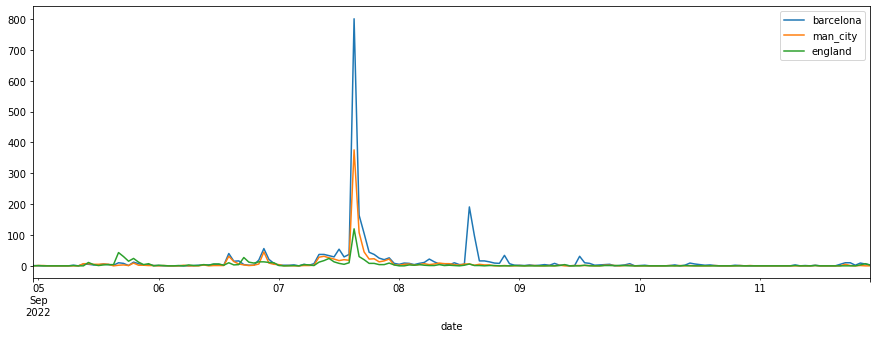

In [35]:
df[["barcelona", "man_city", "england"]].resample("H").sum().plot( figsize=(15,5))

In [59]:
language = df[["lang", "count"]].reset_index().copy()

In [50]:
language

,date,lang,count
0,2022-09-11 22:16:42+00:00,en,1
1,2022-09-11 22:05:49+00:00,und,1
2,2022-09-11 22:05:06+00:00,en,1
3,2022-09-11 22:02:56+00:00,en,1
4,2022-09-11 21:59:40+00:00,es,1
5,2022-09-11 21:55:59+00:00,qam,1
6,2022-09-11 21:22:46+00:00,en,1
7,2022-09-11 21:21:52+00:00,es,1
8,2022-09-11 21:19:21+00:00,ca,1
...,...,...,...


In [60]:
language["lang"].value_counts(normalize=True)

en     0.515308
es     0.230219
und    0.063221
ca     0.036779
pt     0.029821
fr     0.024254
qme    0.017694
tl     0.017495
in     0.016700
de     0.008549
qam    0.004771
nl     0.003976
         ...   
cy     0.000596
fa     0.000398
eu     0.000398
hu     0.000398
el     0.000199
zh     0.000199
ro     0.000199
bn     0.000199
lv     0.000199
ml     0.000199
et     0.000199
hi     0.000199
Name: lang, Length: 38, dtype: float64

In [64]:
language["lang"] = language["lang"].apply(lambda x: x if x in ["en", "es", "ca"] else "other")

In [67]:
language["lang"].value_counts()

en       2592
es       1158
other    1095
ca        185
Name: lang, dtype: int64

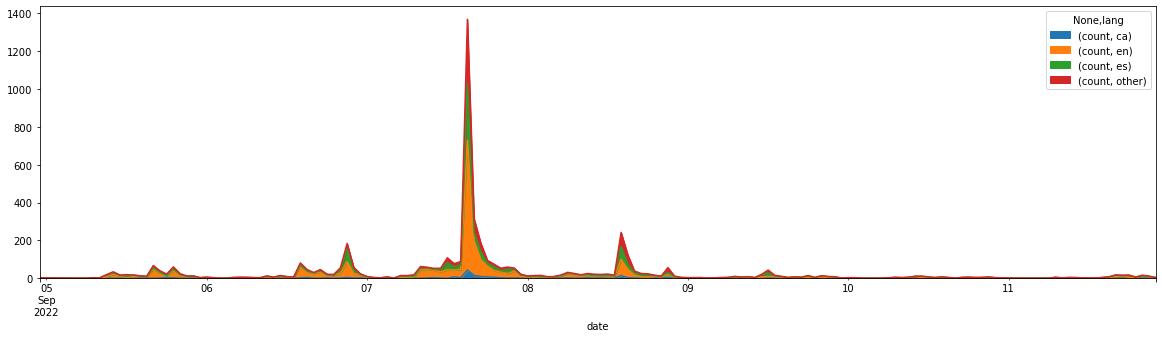

In [86]:
language.groupby(["date", "lang"]).sum().unstack().resample("H").sum().plot(kind="area", figsize=(20,5))